In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [10]:
iris_df = pd.read_csv("IRIS.csv")
print("Dataset Info:")
print(iris_df.info())
print("\nFirst 5 rows of the dataset:")
display(iris_df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

First 5 rows of the dataset:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


C:\Users\hp\AppData\Local\Temp\ipykernel_17572\3730792888.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="species", data=iris_df, palette="viridis")


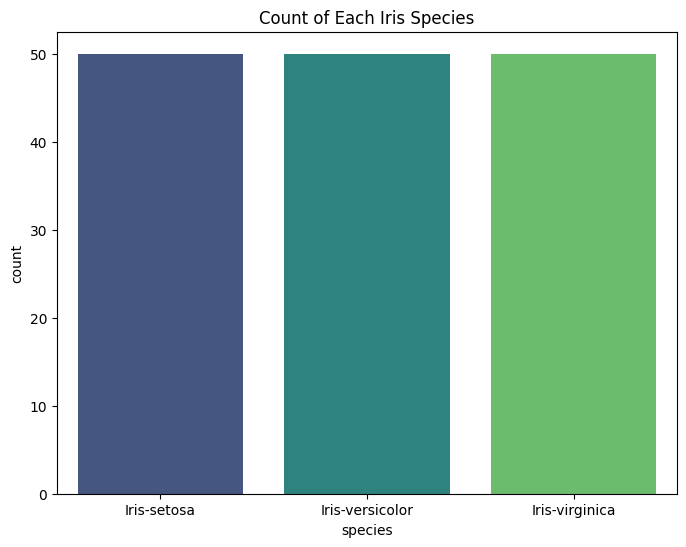

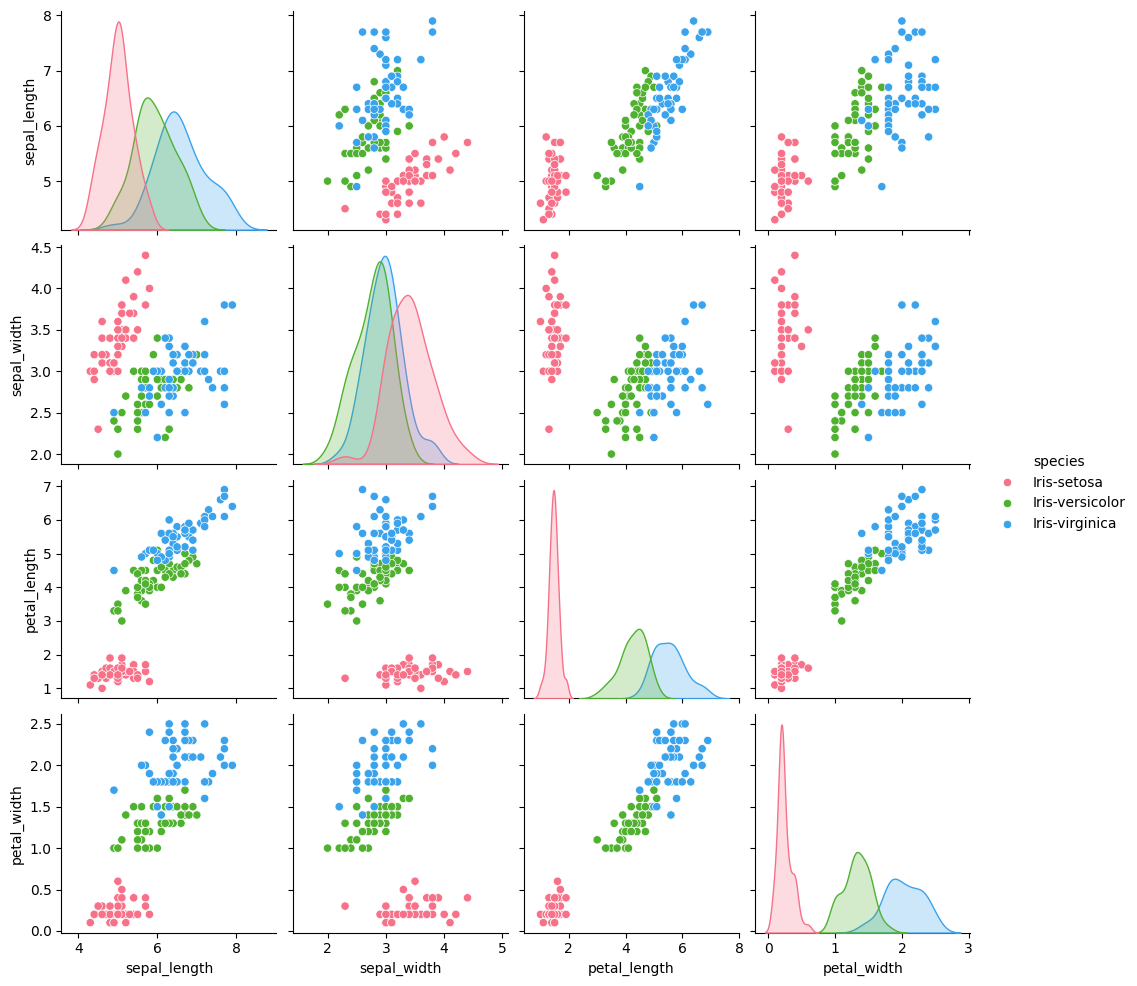

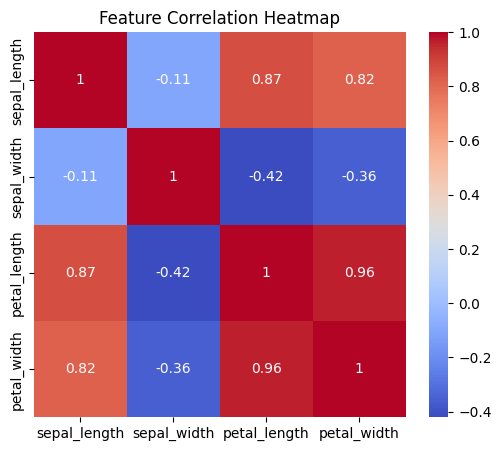

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x="species", data=iris_df, palette="viridis")
plt.title("Count of Each Iris Species")
plt.show()

sns.pairplot(iris_df, hue="species", palette="husl", diag_kind="kde")
plt.show()

plt.figure(figsize=(6, 5))
sns.heatmap(iris_df.drop("species", axis=1).corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [12]:
X = iris_df.drop("species", axis=1)
y = iris_df["species"]

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [13]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(kernel="rbf"),
    "Random Forest": RandomForestClassifier(random_state=42)
}

print("Cross-Validation Accuracy (Baseline):")
cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y_encoded, cv=5)
    cv_results[name] = scores.mean()
    print(f"{name}: {scores.mean():.4f}")

Cross-Validation Accuracy (Baseline):
Logistic Regression: 0.9600
K-Nearest Neighbors: 0.9600
Support Vector Machine: 0.9667
Random Forest: 0.9600


In [14]:
param_grids = {
    "K-Nearest Neighbors": {
        "n_neighbors": [3, 5, 7, 9],
        "weights": ["uniform", "distance"]
    },
    "Support Vector Machine": {
        "C": [0.1, 1, 10, 100],
        "gamma": ["scale", "auto"],
        "kernel": ["linear", "rbf", "poly"]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 4, 6, 8],
        "min_samples_split": [2, 4, 6]
    }
}

best_models = {}

print("\nGridSearchCV Results:")
for name, params in param_grids.items():
    grid = GridSearchCV(models[name], params, cv=5, scoring="accuracy", n_jobs=-1)
    grid.fit(X_train, y_train)
    print(f"\n{name}:")
    print("Best Parameters:", grid.best_params_)
    print("Best CV Accuracy:", grid.best_score_)
    best_models[name] = grid.best_estimator_


GridSearchCV Results:

K-Nearest Neighbors:
Best Parameters: {'n_neighbors': 9, 'weights': 'distance'}
Best CV Accuracy: 0.9666666666666668

Support Vector Machine:
Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best CV Accuracy: 0.975

Random Forest:
Best Parameters: {'max_depth': 4, 'min_samples_split': 4, 'n_estimators': 100}
Best CV Accuracy: 0.9583333333333334


In [15]:
final_model = best_models["Random Forest"]  # Pick the best among tuned ones
y_pred = final_model.predict(X_test)

print("\nFinal Model (Random Forest with best params):")
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Final Model (Random Forest with best params):
Test Accuracy: 0.9666666666666667

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



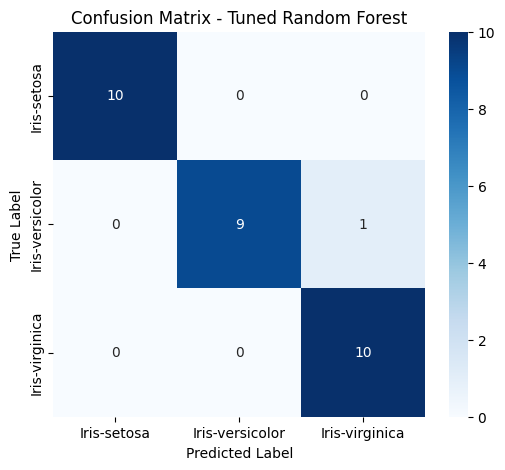

In [16]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - Tuned Random Forest")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_17572\2350224284.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette="viridis")


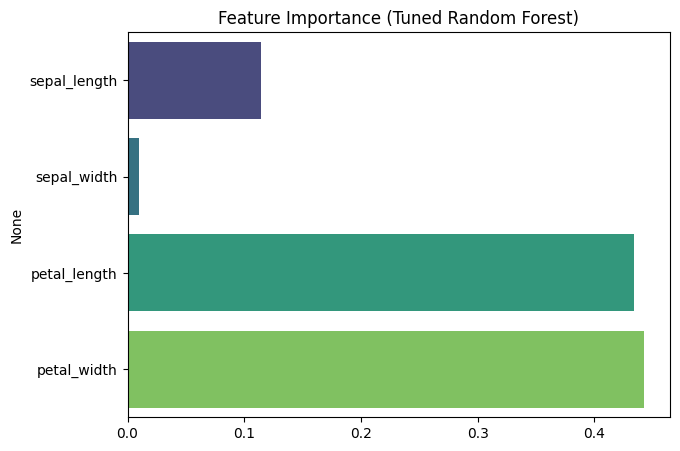

In [17]:
importances = final_model.feature_importances_
feature_names = iris_df.drop("species", axis=1).columns

plt.figure(figsize=(7, 5))
sns.barplot(x=importances, y=feature_names, palette="viridis")
plt.title("Feature Importance (Tuned Random Forest)")
plt.show()

In [18]:
sample = [[5.1, 3.5, 1.4, 0.2]]
sample_scaled = scaler.transform(sample)
prediction = final_model.predict(sample_scaled)
print("Predicted species for sample:", label_encoder.inverse_transform(prediction)[0])

Predicted species for sample: Iris-setosa


C:\Users\hp\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
